# Лабораторная работа № 2
## Корнилова Ксения Сергеевна 17АСВ
### Вариант 11

1.Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [92]:
import pandas as pd
zoo = pd.read_csv('zoo.csv')
zoo.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


animal_name: Особь  
hair: Наличие шерсти  
feathers: Наличие перьев  
eggs: Яйцекладущие  
milk: Млекопитающие  
airborne: Птицы  
aquatic: Рыбы  
predator: Плотоядные  
toothed: Челюстноротые  
backbone: Позвоночные  
breathes: Наземные  
venomous: Ядовитые  
fins: Наличие плавников  
legs: Количество ног (лап)  
tail: Наличие хвоста  
domestic: Домашние  
catsize: Семейство кошачьих  
class_type: Тип класса  

2.Удалите дубликаты строк в наборе данных, приведите размер набора данных до и после данной операции.

In [93]:
zoo.shape

(101, 18)

In [94]:
zoo.drop_duplicates()
zoo.shape

(101, 18)

3.Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая).

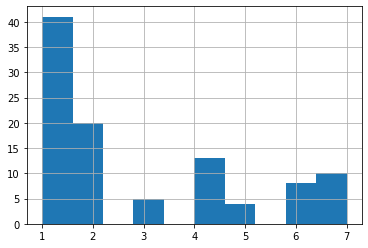

In [95]:
zoo.class_type.hist()

4.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

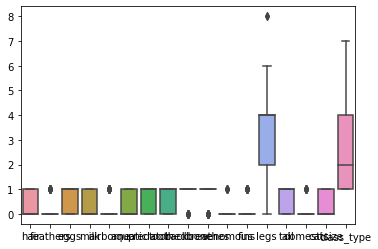

In [96]:
import seaborn as sns
names = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']
sns.boxplot(data=zoo[names])
import matplotlib.pyplot as plt
plt.show()

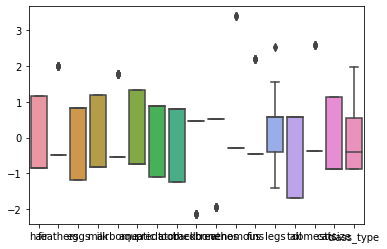

In [97]:
numer = zoo[names]
numer = (numer - numer.mean()) / numer.std()
sns.boxplot(data=numer)
plt.show()

5.Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [98]:
categorical_attr = [c for c in zoo.columns if zoo[c].dtype.name == 'object']
print (categorical_attr)

['animal_name']


6.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

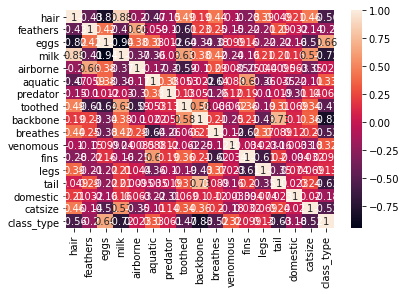

In [99]:
sns.heatmap(zoo.corr(), annot = True)
plt.show()

7.Заполните пропущенные значения в данных;

In [100]:
zoo.count()

animal_name    101
hair           101
feathers       101
eggs           101
milk           101
airborne       101
aquatic        101
predator       101
toothed        101
backbone       101
breathes       101
venomous       101
fins           101
legs           101
tail           101
domestic       101
catsize        101
class_type     101
dtype: int64

Пропущенных значений нет.

8.Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

№ 2) классификатор K ближайших соседей (задаётся количество ближайших объектов):

In [101]:
zoo = zoo.drop(('animal_name'), axis=1)
X = zoo
Y = zoo.hair
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.40, random_state = 0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

60 41


In [102]:
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)
probs_cl = classifier.predict_proba(X_test)
y_pred_cl = classifier.predict(X_test)
result = sk.metrics.accuracy_score(y_test,y_pred_cl)
print("Точность:",result)

Точность: 0.926829268292683


№ 4) логический классификатор (бинарное решающее дерево):

In [103]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
probs_tree = tree.predict_proba(X_test)
y_pred_tree = tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        17

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



9.Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

In [104]:
proba_cl = classifier.predict_proba(X_test)
proba_tree = tree.predict_proba(X_test)
inversion = [1-y for y in y_test]

In [105]:
import matplotlib.pyplot as plt
def GraphPR(proba, occupancy, label, test):
    precision, recall, _ = sk.metrics.precision_recall_curve(test, proba[:, occupancy])
    aps = sk.metrics.average_precision_score(test, proba[:, occupancy])
    plt.plot(recall, precision, label='%s, average_precision = %f' % (label,aps))

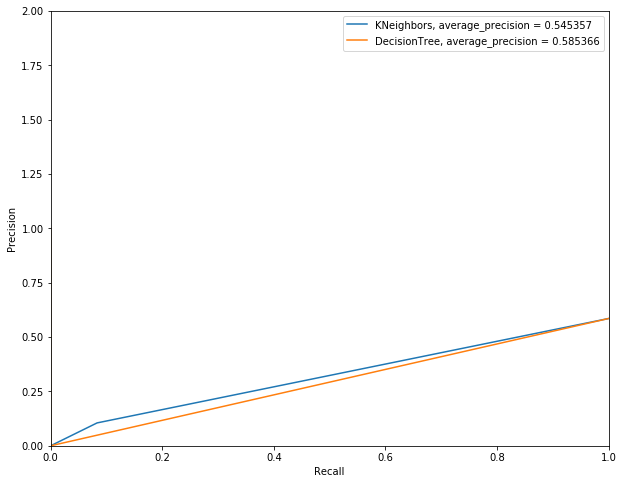

In [106]:
plt.figure(figsize=(10,8))
GraphPR(proba_cl, 1, 'KNeighbors', inversion)
GraphPR(proba_tree, 1, 'DecisionTree', inversion)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 2.0])
plt.legend()
plt.show()

In [115]:
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
def GraphROC(prob, label, test):
    tpr, fpr, _ = roc_curve(test, prob[:, 0])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s, roc_auc = %f' % (label, roc_auc))

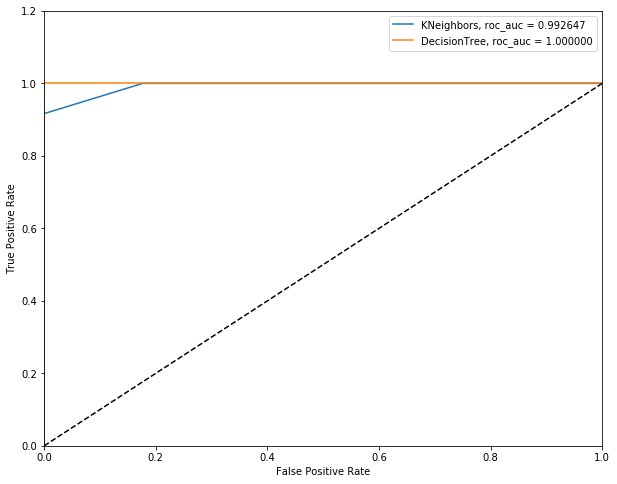

In [119]:
plt.figure(figsize=(10,8))
GraphROC(proba_cl, 'KNeighbors', y_test)
GraphROC(proba_tree, 'DecisionTree', y_test)
plt.plot([0, 1.5], [0, 1.5], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Вывод: Классификатор "Бинарное решающее дерево" показал себя лучше на данной выборке.